Fortune 5000incus is a list of fastest growing companies. We used data from 10 years for 
to study the trend. The companies that are on the list keep changing every year
and based on the industry the demand forthe workers changes which affects the revenue. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns


# DATAPREPROCESSING
 #The data was downloaded from world dataworld datasets by Aurielle,  It is a list of Fortune 500 companies in USA since the past 10years. Each row represents the data, each column contains company features:
•	Year
•	Rank
•	City 
•	Growth
•	Worker
•	Company
•	State-s
•	State-y
•	Revenue
•	Years on List
•	Industry
•	Metro


In [2]:
usdataclean = pd.read_csv("inc5000us_10years.csv", encoding="latin1")

In [3]:
usdataclean.head()

,year,_ - rank,_ - city,_ - growth,_ - workers,_ - company,_ - state_s,_ - state_l,_ - revenue,_ - yrs_on_list,_ - industry,_ - metro
0,2016,1,Los Angeles,66788.5962,218.0,Loot Crate,CA,California,116247698.0,1,Consumer Products & Services,Los Angeles
1,2016,2,Somerville,36555.2472,100.0,Paint Nite,MA,Massachusetts,55018793.0,2,Consumer Products & Services,Boston
2,2016,3,Visalia,31633.5448,47.0,CalCom Solar,CA,California,33507450.0,2,Energy,"Visalia-Porterville, CA"
3,2016,4,Evansville,23619.7198,82.0,eLuxurySupply.com,IN,Indiana,30695215.0,2,Retail,"Evansville, IN-KY"
4,2016,5,Atlanta,23486.8894,48.0,Company.com,GA,Georgia,33370967.0,2,Business Products & Services,Atlanta


 Renames columns to lowercase, runs headings and puts them into new Dataframe 

In [4]:
usdataclean.columns

Index(['year', '_ - rank', '_ - city', '_ - growth', '_ - workers',
       '_ - company', '_ - state_s', '_ - state_l', '_ - revenue',
       '_ - yrs_on_list', '_ - industry', '_ - metro'],
      dtype='object')

In [5]:
usdataclean = usdataclean.rename(columns={'_ - rank':'rank', '_ - city':'city','_ - growth':'growth', 
                      '_ - workers':'workers', '_ - workers':'workers',
                      '_ - company': 'company', '_ - state_s':'state_s', '_ - state_l':'state_l',
                      '_ - revenue':'revenue', '_ - yrs_on_list':'yrs_on_list','_ - industry':'industry',
                      '_ - metro':'metro'
                      })

In [6]:
# COLUMNS
col_names = usdataclean.columns.tolist()
print("Column names:")
print(col_names)
#print("\nSample data:")
usdataclean.head()

Column names:
['year', 'rank', 'city', 'growth', 'workers', 'company', 'state_s', 'state_l', 'revenue', 'yrs_on_list', 'industry', 'metro']


,year,rank,city,growth,workers,company,state_s,state_l,revenue,yrs_on_list,industry,metro
0,2016,1,Los Angeles,66788.5962,218.0,Loot Crate,CA,California,116247698.0,1,Consumer Products & Services,Los Angeles
1,2016,2,Somerville,36555.2472,100.0,Paint Nite,MA,Massachusetts,55018793.0,2,Consumer Products & Services,Boston
2,2016,3,Visalia,31633.5448,47.0,CalCom Solar,CA,California,33507450.0,2,Energy,"Visalia-Porterville, CA"
3,2016,4,Evansville,23619.7198,82.0,eLuxurySupply.com,IN,Indiana,30695215.0,2,Retail,"Evansville, IN-KY"
4,2016,5,Atlanta,23486.8894,48.0,Company.com,GA,Georgia,33370967.0,2,Business Products & Services,Atlanta


#### Cleaned data no missing values

In [7]:
del usdataclean["metro"]

In [8]:
usdataclean.dtypes

year             int64
rank             int64
city            object
growth         float64
workers        float64
company         object
state_s         object
state_l         object
revenue        float64
yrs_on_list      int64
industry        object
dtype: object

In [9]:
usdataclean.loc[(usdataclean["industry"].isnull()), 'industry'] = "Unknown"
usdataclean

,year,rank,city,growth,workers,company,state_s,state_l,revenue,yrs_on_list,industry
0,2016,1,Los Angeles,66788.5962,218.0,Loot Crate,CA,California,116247698.0,1,Consumer Products & Services
1,2016,2,Somerville,36555.2472,100.0,Paint Nite,MA,Massachusetts,55018793.0,2,Consumer Products & Services
2,2016,3,Visalia,31633.5448,47.0,CalCom Solar,CA,California,33507450.0,2,Energy
3,2016,4,Evansville,23619.7198,82.0,eLuxurySupply.com,IN,Indiana,30695215.0,2,Retail
4,2016,5,Atlanta,23486.8894,48.0,Company.com,GA,Georgia,33370967.0,2,Business Products & Services
5,2016,6,Boston,16196.5338,15.0,Globalization Partners,MA,Massachusetts,17743829.0,2,Business Products & Services
6,2016,7,New York,14574.6474,130.0,BounceX,NY,New York,15733570.0,1,Software
7,2016,8,Santa Monica,14404.6093,25.0,Los York,CA,California,15598837.0,1,Advertising & Marketing
8,2016,9,Pittsburgh,13380.8799,39.0,PANTHERx Specialty Pharmacy,PA,Pennsylvania,42425003.0,2,Health
9,2016,10,Leesburg,12620.5845,9.0,FedBiz IT Solutions,VA,Virginia,25863238.0,2,Government Services


In [10]:
usdataclean=usdataclean.drop(usdataclean.loc[(usdataclean["revenue"].isnull()),:].index[:])

In [11]:
usdataclean=usdataclean.drop(usdataclean.loc[(usdataclean["workers"].isnull()),:].index[:])

In [12]:
usdataclean=usdataclean.drop(usdataclean.loc[(usdataclean["growth"].isnull()),:].index[:])

##### data contains 50197 rows of data and 12 columns based on company attributes;

In [13]:
usdataclean.shape

(50189, 11)

## DATA EXPLORATION

In [14]:
usdataclean.count()

year           50189
rank           50189
city           50189
growth         50189
workers        50189
company        50189
state_s        50189
state_l        50189
revenue        50189
yrs_on_list    50189
industry       50189
dtype: int64

In [15]:
usdataclean.groupby('growth').mean()

,year,rank,workers,revenue,yrs_on_list
growth,,,,,
0.7643,2010.0,5001.0,50.0,6.199177e+06,5.0
0.9986,2010.0,5000.0,63.0,2.063617e+07,3.0
1.0961,2010.0,4999.0,16.0,4.773944e+06,4.0
1.3335,2010.0,4998.0,28.0,7.160553e+06,3.0
1.3887,2010.0,4996.0,3.0,4.395953e+06,4.0
1.4085,2010.0,4995.0,446.0,4.320000e+08,1.0
1.5000,2010.0,4994.0,368.0,2.030000e+08,2.0
1.6383,2010.0,4993.0,38.0,8.906964e+06,2.0
1.6554,2010.0,4991.0,350.0,1.801040e+07,1.0


In [16]:
usdataclean.groupby('industry').mean()

,year,rank,growth,workers,revenue,yrs_on_list
industry,,,,,,
Advertising & Marketing,2012.655619,2330.472645,461.965460,71.108059,1.716247e+07,3.631328
Business Products & Services,2012.319825,2899.978943,309.383732,290.447358,6.686446e+07,3.857569
Computer Hardware,2011.812346,2650.592593,325.729313,171.720988,1.769577e+08,3.795062
Construction,2012.278008,2575.063071,296.085709,181.157676,5.821893e+07,3.116183
Consumer Products & Services,2012.598633,2272.594077,669.875398,165.064237,6.579798e+07,3.592711
Education,2012.475943,2481.726918,364.515559,182.596879,1.778448e+07,3.704811
Energy,2012.420949,2011.676877,827.636156,182.137352,1.121021e+08,3.569170
Engineering,2011.948931,2854.859857,194.017663,145.456057,2.237278e+07,3.802850
Environmental Services,2011.676375,2815.862460,196.434373,159.156958,3.137284e+07,3.883495


In [17]:
groupedusdataclean=usdataclean.groupby("growth").sum()["revenue"]
groupedusdataclean

growth
0.7643         6.199177e+06
0.9986         2.063617e+07
1.0961         4.773944e+06
1.3335         7.160553e+06
1.3887         4.395953e+06
1.4085         4.320000e+08
1.5000         2.030000e+08
1.6383         8.906964e+06
1.6554         1.801040e+07
1.6626         2.942000e+07
1.6651         4.161991e+06
1.6943         6.846614e+06
1.7449         5.107819e+06
1.7474         1.860059e+07
1.8333         1.788600e+07
1.8634         2.460000e+06
1.8642         1.378017e+07
1.8868         2.700000e+08
1.8894         4.702893e+06
1.9024         3.501714e+06
1.9469         1.586600e+07
1.9635         4.350186e+06
1.9981         1.944544e+07
2.0618         6.543063e+06
2.1047         2.882472e+06
2.1277         4.800000e+06
2.2217         1.109172e+07
2.2663         9.001064e+06
2.3670         6.287371e+06
2.3943         5.432566e+06
                   ...     
21337.4384     8.703600e+07
21752.8935     3.048500e+07
22035.7627     3.715200e+07
23308.1822     1.919062e+09
23484.1623   

In [18]:
usdataclean[[ 'growth', 'industry']].groupby(['growth', 'industry'])


In [19]:
usrevtot=usdataclean.groupby("workers").sum()
usrevtot

,year,rank,growth,revenue,yrs_on_list
workers,,,,,
0.0,341753,536688,24450.8162,2.281743e+10,624
1.0,124790,105916,42424.1090,6.524292e+08,172
2.0,225422,197018,67236.4772,9.196131e+08,266
3.0,275722,280359,66592.1816,1.291386e+09,388
4.0,426609,378577,149434.6654,1.301909e+09,601
5.0,615839,620833,176538.6690,1.971249e+09,794
6.0,734514,766874,201382.4947,2.591730e+09,1004
7.0,843251,889105,199184.0052,2.597359e+09,1224
8.0,1036339,1034656,227563.9753,2.758007e+09,1521


In [20]:
df= (usdataclean.loc[:,['rank','industry']])
df = df.set_index('rank')
(df)

,industry
rank,
1,Consumer Products & Services
2,Consumer Products & Services
3,Energy
4,Retail
5,Business Products & Services
6,Business Products & Services
7,Software
8,Advertising & Marketing
9,Health


In [21]:
usdataclean["growth"].value_counts().to_dict()

{150.0: 10,
 100.0: 9,
 300.0: 6,
 166.6667: 5,
 40.0: 5,
 200.0: 4,
 66.6667: 3,
 43.75: 3,
 80.0: 3,
 20.0: 3,
 92.3077: 3,
 120.0: 3,
 33.3333: 3,
 400.0: 3,
 156.9466: 3,
 60.6333: 3,
 91.81: 3,
 8.0: 3,
 551.3764: 2,
 97.2048: 2,
 196.5032: 2,
 43.6882: 2,
 65.9439: 2,
 64.1064: 2,
 23.5578: 2,
 152.0281: 2,
 17.3673: 2,
 99.8385: 2,
 53.8772: 2,
 99.2957: 2,
 88.8953: 2,
 60.6219: 2,
 60.73: 2,
 170.9575: 2,
 52.5643: 2,
 350.0: 2,
 112.5646: 2,
 34.5785: 2,
 83.4471: 2,
 43.4577: 2,
 58.7518: 2,
 52.2395: 2,
 27.0833: 2,
 45.8436: 2,
 76.6733: 2,
 110.6924: 2,
 189.1412: 2,
 9.827: 2,
 56.9623: 2,
 72.2391: 2,
 94.3563: 2,
 95.9572: 2,
 94.2165: 2,
 176.6547: 2,
 162.1918: 2,
 98.915: 2,
 371.0767: 2,
 143.4759: 2,
 127.1085: 2,
 264.4839: 2,
 121.4112: 2,
 667.8571: 2,
 160.9334: 2,
 83.2339: 2,
 72.4119: 2,
 271.5605: 2,
 65.3897: 2,
 65.3746: 2,
 141.1525: 2,
 55.4115: 2,
 52.8434: 2,
 98.7047: 2,
 26.5562: 2,
 95.9174: 2,
 85.0144: 2,
 46.5273: 2,
 744.3938: 2,
 82.637999999

In [22]:
usdataclean["industry"].value_counts().to_dict()

{'IT Services': 6642,
 'Business Products & Services': 5034,
 'Advertising & Marketing': 4405,
 'Health': 3756,
 'Software': 3200,
 'Government Services': 2507,
 'Manufacturing': 2454,
 'Construction': 2410,
 'Financial Services': 2396,
 'Consumer Products & Services': 2195,
 'Human Resources': 1887,
 'Retail': 1864,
 'Food & Beverage': 1400,
 'Telecommunications': 1397,
 'Logistics & Transportation': 1392,
 'Real Estate': 1040,
 'Energy': 1012,
 'Engineering': 842,
 'Education': 769,
 'Security': 717,
 'Insurance': 676,
 'Media': 626,
 'Environmental Services': 618,
 'Travel & Hospitality': 513,
 'Computer Hardware': 405,
 'Unknown': 32}

## DATA VISUALIZATION

Industry is separated into 2 categories based on ranking. 

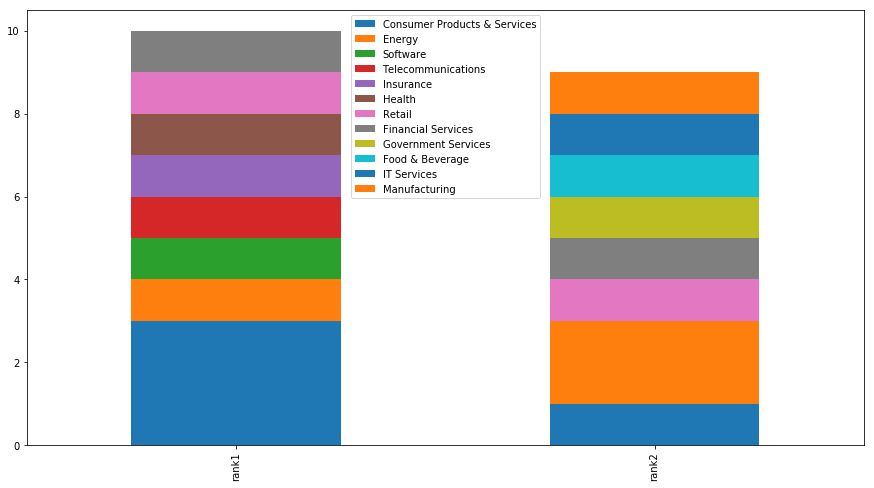

In [42]:

industry_rank1 = usdataclean[usdataclean['rank']==1]['industry'].value_counts()
industry_rank2 = usdataclean[usdataclean['rank']==2]['industry'].value_counts()
#making seperate dataframe with required values for plotting
df_New = pd.DataFrame([industry_rank1,industry_rank2])
df_New.index = ['rank1','rank2']
figure=df_New.plot(kind='bar',stacked=True,figsize=(15,8))
figure.legend(loc='upper center')

Grouped our industry growth aggregate by revenue.It is evident that the growth of the company can be known by the revenue made.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

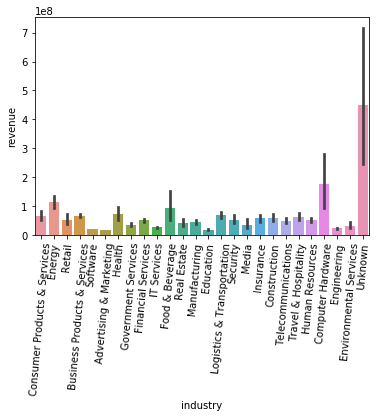

In [26]:
sns.barplot(x='industry',y='revenue',data=usdataclean)
plt.xticks(rotation=85)
#25 degree angle 